In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## SUMMARY
For Week 20, we would like you to build a map.

Our data this week comes from InsideAirbnb and was provided by Frederic Frey for the VizIt Syndey community conference. “Inside Airbnb is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. They work towards a vision where communities are empowered with data and information to understand, decide and control the role of renting residential homes to tourists.” Please reference their site as your data source.



Our data set contains the following fields:

- id - Airbnb's unique identifier for the listing
- name - Name of the Listing
- host_id - Airbnb’s unique identifier for the host/user
- host_name - Name of the host (usually just the first name)
- neighbourhood
- latitude
- longitude
- room_type - entire place, private room, shared room
- price - daily price in local currency
- minimum_nights - minimum number of night stay fr the listing
- number_of_reviews - number of reviews the listing has
- reviews_per_month - average number of review per month
- calculated_host_listings_count - the number of listings the host has in the current scrape
- number_of_reviews_ltm - number of review the listing has in the last 12 months

# EDA - Exploratory Data Analysis

In [2]:
df = pd.read_csv('../Data/Sydney Airbnb Listings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24022 entries, 0 to 24021
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24022 non-null  float64
 1   name                            24022 non-null  object 
 2   host_id                         24022 non-null  int64  
 3   host_name                       24020 non-null  object 
 4   neighbourhood                   24022 non-null  object 
 5   latitude                        24022 non-null  float64
 6   longitude                       24022 non-null  float64
 7   room_type                       24022 non-null  object 
 8   price                           24022 non-null  int64  
 9   minimum_nights                  24022 non-null  int64  
 10  number_of_reviews               24022 non-null  int64  
 11  reviews_per_month               18028 non-null  float64
 12  calculated_host_listings_count  

In [3]:
# check for missing values
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_values_info = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage (%)': missing_values_percentage
})

missing_values_info.sort_values(by='Percentage (%)', ascending=False)


,Missing Values,Percentage (%)
reviews_per_month,5994,24.952127
host_name,2,0.008326
id,0,0.000000
name,0,0.000000
host_id,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


reviews per month have about 25% missing values and host_name have 2 missing values it should not bring any significant effect to the analysis. other columns have no missing values

## statsicial summary of the data

In [4]:
# Statistical summary of numerical columns
numerical_summary = df.describe()

# Frequency distribution of categorical variables
room_type_distribution = df['room_type'].value_counts()
neighbourhood_distribution = df['neighbourhood'].value_counts()

numerical_summary, room_type_distribution, neighbourhood_distribution.head(10)  # Displaying top 10 neighbourhoods for brevity



(                 id       host_id      latitude     longitude         price  \
 count  2.402200e+04  2.402200e+04  24022.000000  24022.000000  24022.000000   
 mean   2.377608e+17  1.281470e+08    -33.855600    151.191621    297.628008   
 std    3.713869e+17  1.401677e+08      0.083137      0.101308    557.674579   
 min    1.115600e+04  9.484000e+03    -34.100680    150.630490     17.000000   
 25%    1.937368e+07  2.180165e+07    -33.897800    151.157948    100.000000   
 50%    3.697962e+07  6.400745e+07    -33.878825    151.212465    176.000000   
 75%    6.727285e+17  1.944103e+08    -33.815613    151.260537    300.000000   
 max    9.729010e+17  5.352494e+08    -33.383640    151.340140  28613.000000   
 
        minimum_nights  number_of_reviews  reviews_per_month  \
 count    24022.000000       24022.000000       18028.000000   
 mean        46.954084          22.115477           0.969843   
 std         53.328473          51.466923           1.330842   
 min          1.000000

- Price:
    - Mean: $297.63
    - Standard Deviation: $557.67
    - Minimum: $17
    - Maximum: $28,613

- Minimum Nights:
    - Mean: 46.95
    - Standard Deviation: 53.33
    - The high average and standard deviation suggest some listings require very long stays, possibly skewing the average.
- Number of Reviews:
    - Mean: 22.12
    - Standard Deviation: 51.47
    - Indicates a wide range in the popularity or age of listings.
- Reviews per Month:
    - Mean: 0.97
    - Standard Deviation: 1.33
    - This variability shows different levels of review activity among listings.
- Calculated Host Listings Count:
    - Mean: 11.59
    - Standard Deviation: 31.29
    - Indicates that some hosts have multiple listings, potentially professional hosts or agencies.
- Number of Reviews LTM (Last Twelve Months):
    - Mean: 6.34
    - Standard Deviation: 13.32
    - Reflects recent activity levels in terms of reviews.

### Price distribution

/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


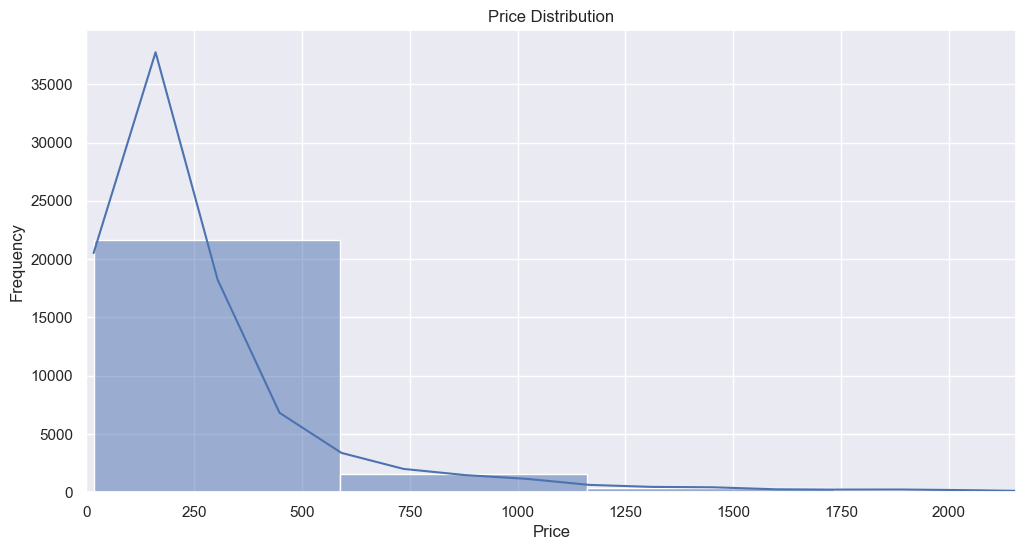

In [5]:
sns.set(style="ticks")
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99))  # Limiting to 99th percentile for better visualization
plt.show()

### number of nights distribution

/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


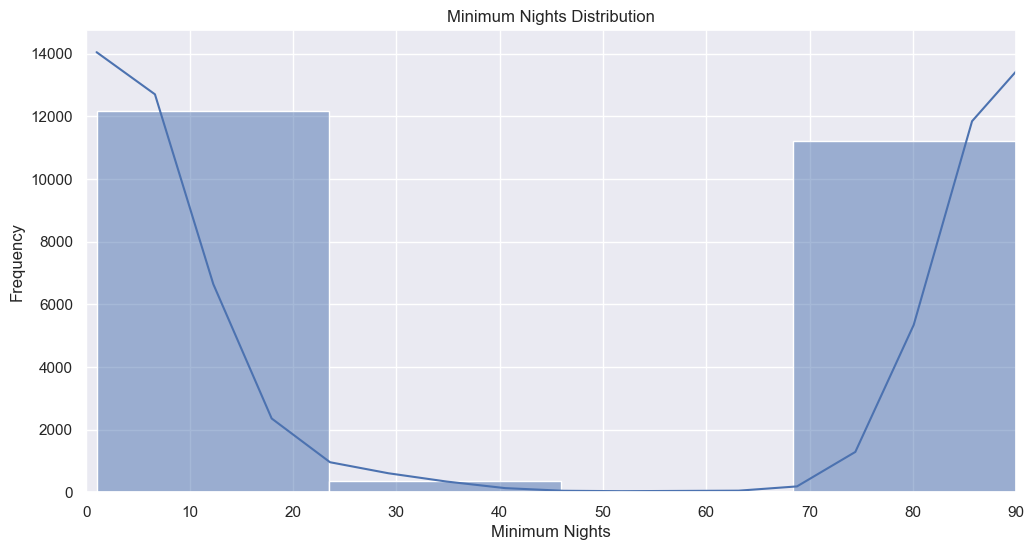

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.xlim(0, df['minimum_nights'].quantile(0.99))  # Limiting to 99th percentile for better visualization
plt.show()

### variables correlation

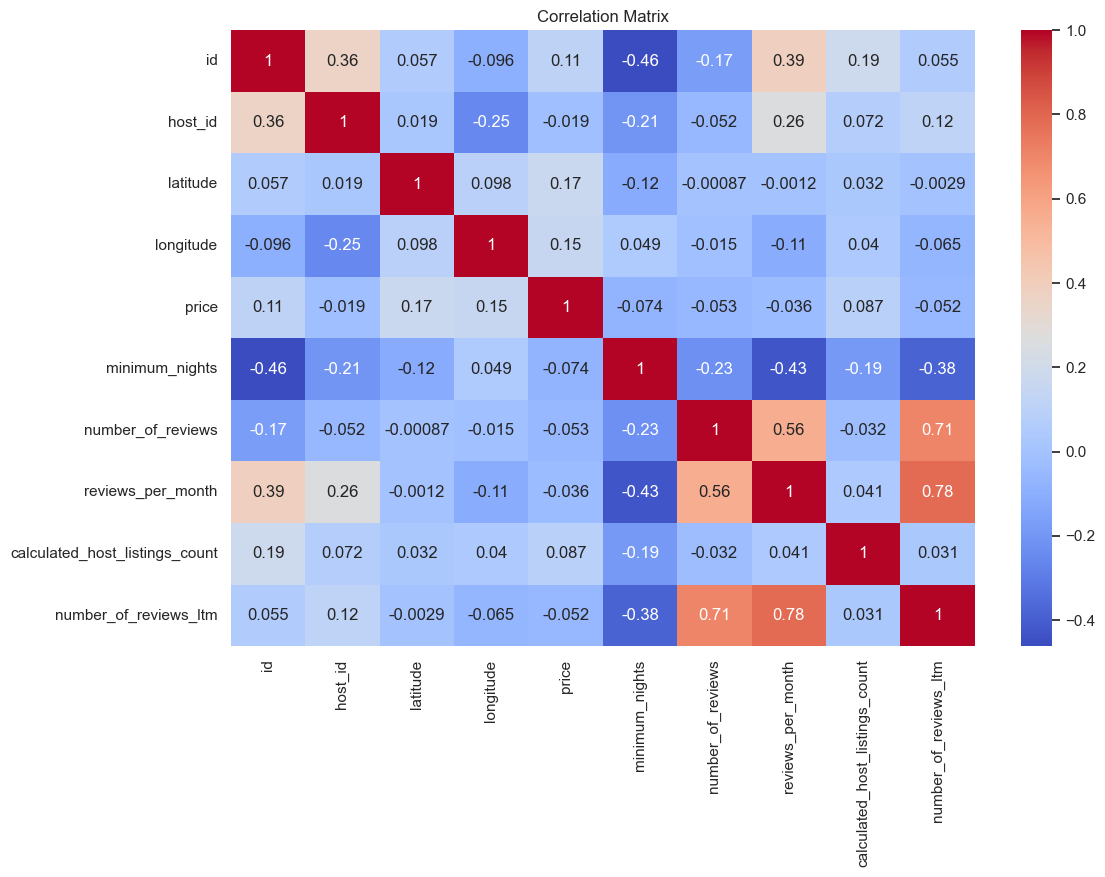

In [7]:

correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

number of reivews have a strong correlation with reviews per month and number of reviews least twelve months, it is reasonable that the more reviews a listing has, the more reviews it will have per month and in the last twelve months.

### location distribution plot

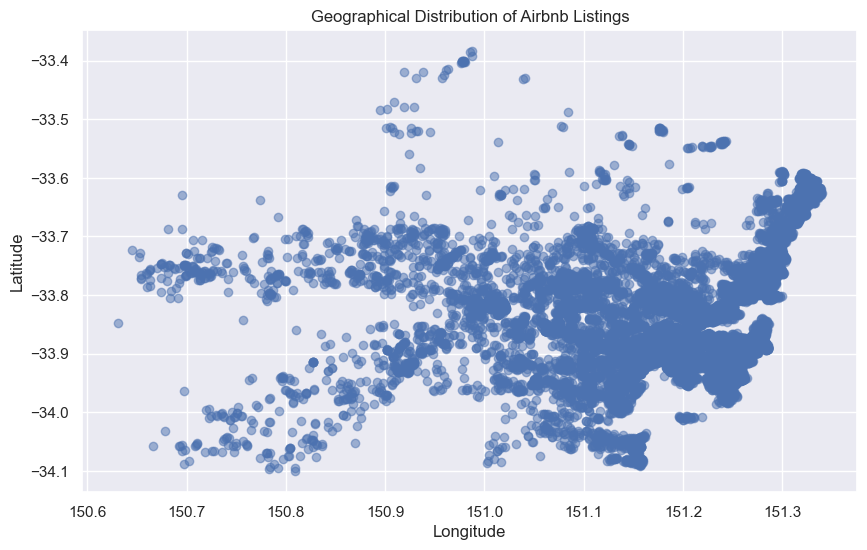

In [8]:
latitude = df['latitude']
longitude = df['longitude']

plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, alpha=0.5)  # alpha controls the transparency of the points
plt.title('Geographical Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [9]:
import plotly.express as px


In [13]:
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude",
                        hover_data=["neighbourhood", "room_type", "price"],
                        size="price",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

we can see that marjority of the listings are located at center of the city, and some listings are located right next to airport.

In [11]:
# Prettymaps
import prettymaps
# Vsketch
import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union